In [27]:
import numpy as np
from scipy.optimize import approx_fprime
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Task2

In [17]:
# Data points
t = np.array([0, 1, 2, 3, 4, 5, 6])
F = np.array([5.0, 5.3, 2.5, -0.5, -1.4, 1.0, 4.3])

# Construct X matrix
X = np.column_stack([
    np.ones_like(t),      # Column for 'a' (intercept)
    np.sin(t),            # Column for 'b' (sin term)
    np.cos(t)             # Column for 'c' (cos term)
])

# Solve normal equation: X^T X a = X^T F
params = np.linalg.inv(X.T @ X) @ X.T @ F
a, b, c = params

print(f"a = {a:.6f}, b = {b:.6f}, c = {c:.6f}")

a = 2.039099, b = 1.949503, c = 2.937251


### Task3 Verification

In [18]:
# Cost function W(a, b, c)
def W(params):
    a, b, c = params
    residuals = a + b * np.sin(t) + c * np.cos(t) - F
    return np.sum(residuals**2)

# Numerical gradients
grad_numerical = approx_fprime(np.array([a, b, c]), W, epsilon=1e-6)
print(f"Numerical gradients: dW/da = {grad_numerical[0]:.4f}, dW/db = {grad_numerical[1]:.4f}, dW/dc = {grad_numerical[2]:.4f}")

# Analytical gradients
grad_analytical = np.array([
    2 * np.sum(a + b * np.sin(t) + c * np.cos(t) - F),
    2 * np.sum((a + b * np.sin(t) + c * np.cos(t) - F) * np.sin(t)),
    2 * np.sum((a + b * np.sin(t) + c * np.cos(t) - F) * np.cos(t))
])
print(f"Analytical gradients: dW/da = {grad_analytical[0]:.4f}, dW/db = {grad_analytical[1]:.4f}, dW/dc = {grad_analytical[2]:.4f}")

Numerical gradients: dW/da = 0.0000, dW/db = 0.0000, dW/dc = 0.0000
Analytical gradients: dW/da = -0.0000, dW/db = -0.0000, dW/dc = 0.0000


### Task4

In [32]:
# Gradient of W
def grad_W(params):
    a, b, c = params
    residuals = a + b * np.sin(t) + c * np.cos(t) - F
    dW_da = 2 * np.sum(residuals)
    dW_db = 2 * np.sum(residuals * np.sin(t))
    dW_dc = 2 * np.sum(residuals * np.cos(t))
    return np.array([dW_da, dW_db, dW_dc])

# Initial guess
initial_guess = np.array([0.0, 0.0, 0.0])

### BFGS

In [33]:
# Run optimization
result = minimize(W, initial_guess, jac=grad_W, method='BFGS')

# Extract optimized parameters
a_opt, b_opt, c_opt = result.x
print(f"Optimized parameters with BFGS:\na = {a_opt:.6f}, b = {b_opt:.6f}, c = {c_opt:.6f}")
print(f"Final cost W = {result.fun:.6f}")

Optimized parameters with BFGS:
a = 2.039099, b = 1.949503, c = 2.937251
Final cost W = 0.020589


### CG

In [34]:
# Run optimization
result_cg = minimize(W, initial_guess, jac=grad_W, method='CG')

# Extract optimized parameters
a_opt, b_opt, c_opt = result_cg.x
print(f"Optimized parameters with CG:\na = {a_opt:.6f}, b = {b_opt:.6f}, c = {c_opt:.6f}")
print(f"Final cost W = {result_cg.fun:.6f}")

Optimized parameters with CG:
a = 2.039099, b = 1.949503, c = 2.937251
Final cost W = 0.020589


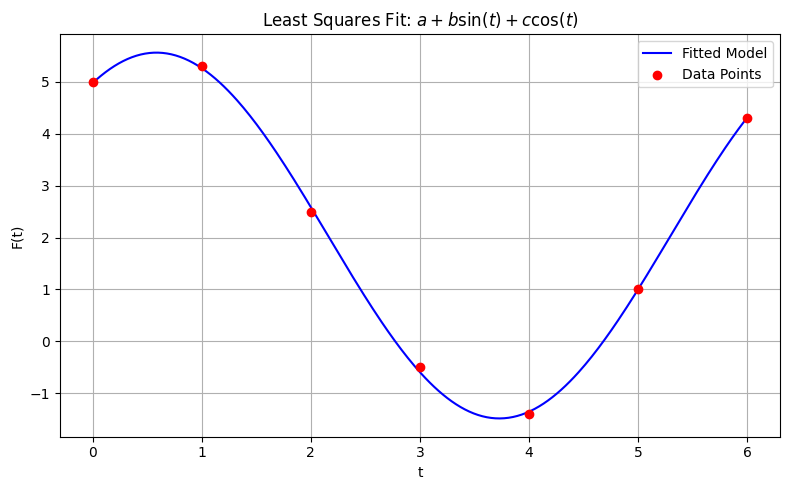

In [35]:
# Fitted model function
def f_model(t, a, b, c):
    return a + b * np.sin(t) + c * np.cos(t)

# Plot
t_plot = np.linspace(0, 6, 300)
F_fit = f_model(t_plot, a_opt, b_opt, c_opt)

plt.figure(figsize=(8, 5))
plt.plot(t_plot, F_fit, label='Fitted Model', color='blue')
plt.scatter(t, F, color='red', label='Data Points', zorder=5)
plt.xlabel("t")
plt.ylabel("F(t)")
plt.title("Least Squares Fit: $a + b\\sin(t) + c\\cos(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Q3.png")
plt.show()